# Experimenting With Models
Build. Fit. Evaluate. ReBuild. ReFit. ReEvaluate. ReBuild. ReFit...
- use more data
- change number of layers
- change the number of "units" in each layer
- train for longer

## Imports

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

## Mock Some Data

In [2]:
X = np.arange(-100, 100, 4)
y = np.arange(-90,110,4)

## Split Data Into Training + Testing

In [3]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

## Visualize

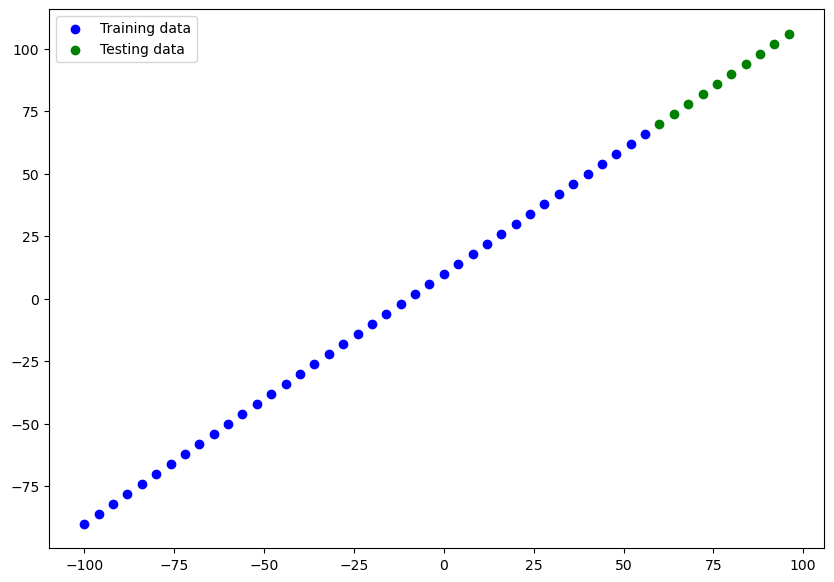

In [4]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

## Begin Experimenting
### Model 1

In [5]:
# for repeatability
tf.random.set_seed(42)

m1Epochs = 100
moreEpochs = 500
lessEpochs = 25

fittedXTrained = tf.expand_dims(X_train, axis=-1)

# BUILD
m1 = tf.keras.Sequential()
l1 = tf.keras.layers.Dense(1)
m1.add(l1)

# COMPILE
m1.compile(loss=tf.keras.losses.mae,
          optimizer=tf.keras.optimizers.SGD(),
          metrics=['mae'])

# FIT
m1.fit(fittedXTrained,y_train, epochs=m1Epochs)

Epoch 1/100
2/2 [==============================] - 1s 22ms/step - loss: 63.7147 - mae: 63.7147
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 28.7626 - mae: 28.7626
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 10.6471 - mae: 10.6471
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 13.1998 - mae: 13.1998
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 12.2716 - mae: 12.2716
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 9.4961 - mae: 9.4961
Epoch 7/100
2/2 [==============================] - 0s 12ms/step - loss: 8.6277 - mae: 8.6277
Epoch 8/100
2/2 [==============================] - 0s 12ms/step - loss: 9.0650 - mae: 9.0650
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 18.8638 - mae: 18.8638
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 10.1885 - mae: 10.1885
Epoch 11/100
2/2 [==============================] - 0s 

#### Predict some outputs

In [6]:
m1Predictions = m1.predict(X_test)

1/1 [==============================] - 0s 201ms/step


In [7]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_test):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

#### Visualize Test, Train, And Predictions

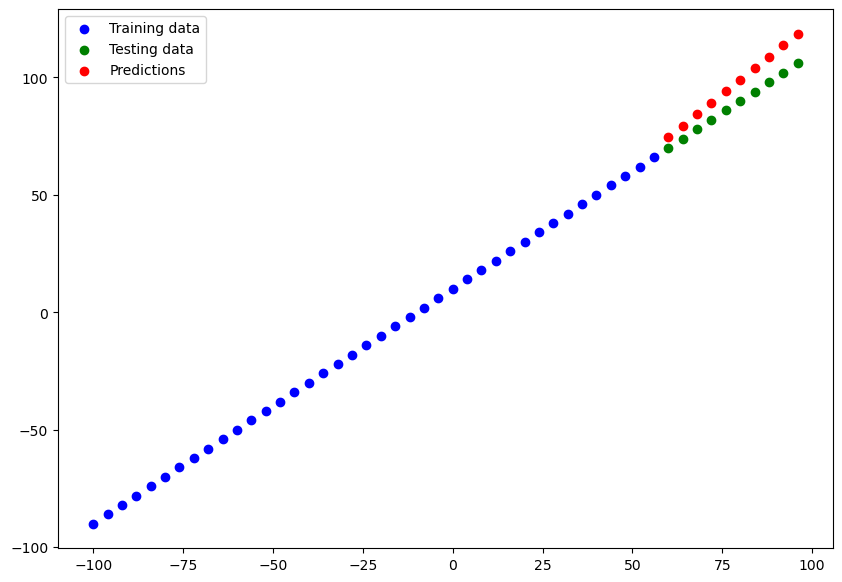

In [8]:
plot_predictions(predictions=m1Predictions)

#### Calculate some model Stats

In [9]:
# Calculate model_1 metrics
mae_1 = mae(y_test, m1Predictions.squeeze()).numpy()
mse_1 = mse(y_test, m1Predictions.squeeze()).numpy()
mae_1, mse_1

(8.585786, 80.21259)

### Model 2: More Layers

#### Build

In [10]:
# BUILD
m2 = tf.keras.Sequential()
m2.add(l1)
m2.add(l1)

# COMPILE
m2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# FIT
m2.fit(fittedXTrained, y_train, epochs=m1Epochs, verbose=0) # set verbose to 0 for less output

#### Predict

1/1 [==============================] - 0s 120ms/step


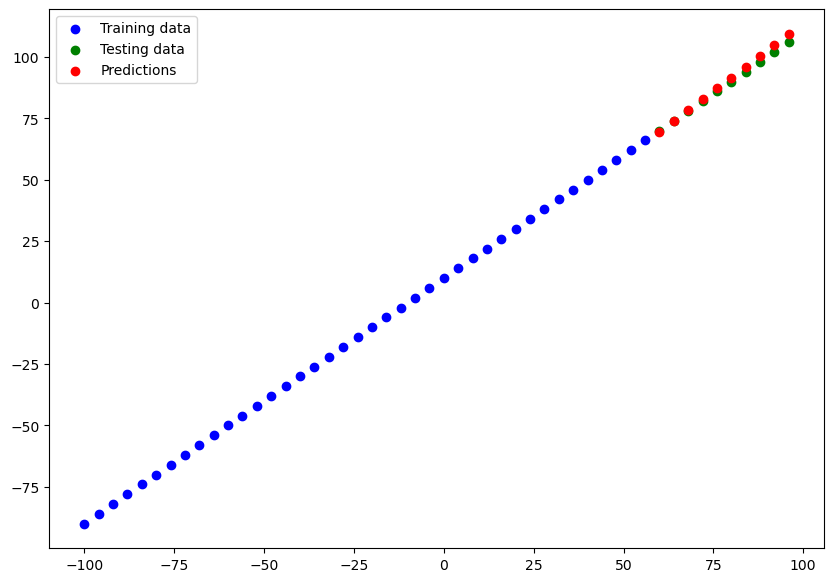

In [11]:
predictionsM2 = m2.predict(X_test)
plot_predictions(predictions=predictionsM2)

#### Get Model Stats

In [12]:
mae_2 = mae(y_test, predictionsM2.squeeze()).numpy()
mse_2 = mse(y_test, predictionsM2.squeeze()).numpy()
mae_2, mse_2

(1.5568199, 3.6158714)

### Model 3: More Epochs
#### Build

In [13]:
# BUILD
m3 = tf.keras.Sequential()
m3.add(l1)
m3.add(l1)

# COMPILE
m3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# FIT
m3.fit(fittedXTrained, y_train, epochs=moreEpochs, verbose=0) # set verbose to 0 for less output

#### Predict

1/1 [==============================] - 0s 119ms/step


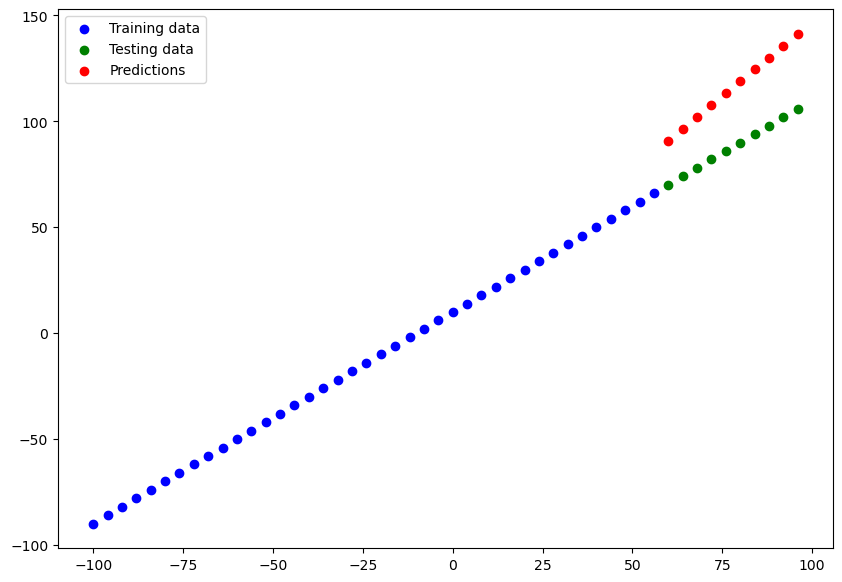

In [14]:
predictionsM3 = m3.predict(X_test)
plot_predictions(predictions=predictionsM3)

#### Get Model Stats

In [15]:
mae_3 = mae(y_test, predictionsM3.squeeze()).numpy()
mse_3 = mse(y_test, predictionsM3.squeeze()).numpy()
mae_3, mse_3

(28.125193, 812.3425)

### Model 4: less epochs

1/1 [==============================] - 0s 172ms/step


(29.59107, 891.5161)

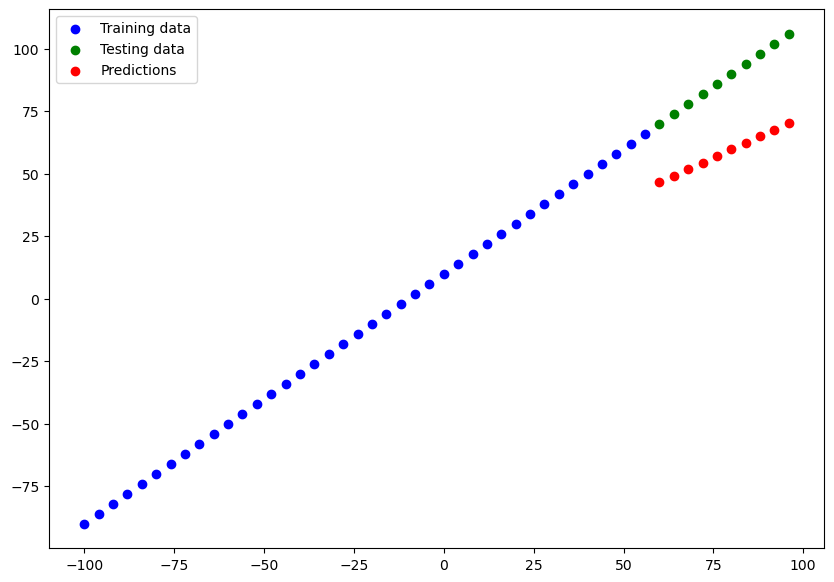

In [18]:
# BUILD
m4 = tf.keras.Sequential()
m4.add(l1)
m4.add(l1)

# COMPILE
m4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# FIT
m4.fit(fittedXTrained, y_train, epochs=lessEpochs, verbose=0) # set verbose to 0 for less output



predictionsM4 = m4.predict(X_test)
plot_predictions(predictions=predictionsM4)
mae_4 = mae(y_test, predictionsM4.squeeze()).numpy()
mse_4 = mse(y_test, predictionsM4.squeeze()).numpy()
mae_4, mse_4

In [19]:
resultsArray = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3],
                ["model_4", mae_4, mae_4]
               ]

all_results = pd.DataFrame(resultsArray, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,8.585786,80.212593
1,model_2,1.556820,3.615871
2,model_3,28.125193,28.125193
3,model_4,29.591070,29.591070
